![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# Proyecto: Innovación Tecnológica en Bodoque Bank

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*



### Equipo:

- Luis Figueroa
- Felipe Méndez


### Link de repositorio de GitHub: `https://github.com/Felipe-mendezp/Labs-Figueroa-Mendez`




## 1. Introducción


En el mundo actual y en medio de la digitalización de la economía, uno de los problemas más críticos y emergentes es el fraude bancario. Esta amenaza es aún más severa debido al desarrollo y avance constante de las tecnologías y técnicas de cibercrimen. Para combatir estos delitos, necesitamos técnicas sofisticadas de análisis de datos y detección de anomalías que nos permitan identificar y prevenir transacciones fraudulentas de manera eficiente.

En el presente proyecto, vamos a trabajar con un dataset llamado "The Bank Account Fraud (BAF)". Este dataset proporciona una vista realista y desafiante del problema de detección de fraude bancario. Nuestro proyecto tiene como objetivo poder detectar transacciones fraudulentas o anomalias. Las tareas principales serán:

- Realizar un Análisis Exploratorio de Datos (EDA) que describa completamente el conjunto de datos con el fin de entender las tendencias y las relaciones en los datos, así como identificar cualquier anomalía obvia o patrones emergentes.

- Llevar a cabo un preprocesamiento de los datos para garantizar que estén en un formato adecuado para el análisis posterior y el entrenamiento del modelo de aprendizaje automático. Este preprocesamiento puede incluir la limpieza de datos, la normalización, la imputación de datos faltantes y la codificación de variables categóricas.

- Realizar una segmentación etaria para agrupar las transacciones por edad de los clientes. Esta segmentación nos permitirá analizar las tendencias y patrones del fraude en diferentes etapas de la visas de lso usuarios, y quizás identificar grupos de mayor riesgo de fraude.

- Generar visualizaciones de baja dimensionalidad con el fin de buscar patrones que podrían no ser evidentes en una inspección superficial de los datos. Estas visualizaciones pueden ayudar a revelar la estructura subyacente de los datos, y también pueden proporcionar intuiciones útiles para el desarrollo del algoritmo de detección de anomalías.

- Crear un algoritmo de detección de anomalías utilizando técnicas de aprendizaje automático para identificar transacciones que se desvíen significativamente de lo que consideramos "normal". El objetivo de este algoritmo será alertar sobre posibles casos de fraude, permitiendo una intervención rápida y eficaz.


El dataset "The Bank Account Fraud (BAF)" consta de una variedad de características que describen tanto el perfil del cliente como la naturaleza de las transacciones bancarias. Estos incluyen datos demográficos del cliente como edad, ingresos, estado de empleo y vivienda, así como detalles específicos de las transacciones, como la cantidad de dinero involucrada, el tipo de pago, y si la transacción fue realizada desde el extranjero. Adicionalmente, se incluyen indicadores de comportamiento del cliente, como la duración de la sesión, la frecuencia y velocidad de las transacciones, y si se utilizaron múltiples direcciones de correo electrónico o tarjetas de crédito. Asimismo, se tiene información sobre el riesgo de crédito del cliente y la validez de sus números de teléfono.



En cuanto a cómo abordaremos este problema, una hipótesis inicial es que podemos aplicar técnicas de preprocesamiento y modelado de datos, en conjunto con tecnicas ed aprendizaje automatico, para identificar patrones en las transacciones y usar esta información para detectar aquellas transacciones que no se ajustan a estos patrones, es decir, que son anomalías.


## 2. Lectura y Manejo de Datos




### 2.1 Cargar datos en dataframes

Como primer paso en proyecto, se realizara la lectura y carga de los datos. Se cargaran tres dataset.Los dos primeros conjuntos de datos corresponden a registros detallados de los clientes del banco, ofreciendo una visión integral de sus perfiles y comportamientos transaccionales. El tercer conjunto de datos aporta un valor adicional, ya que no solo contiene registros de los clientes, sino que también incluye información relativa a sus métodos de contacto. La integración efectiva de estos tres conjuntos de datos será fundamental para nuestro análisis posterior y la detección eficiente de anomalías o comportamientos sospechosos.

In [25]:
import pandas as pd
import numpy as np
import os
import pyarrow.parquet as pq
import matplotlib.pyplot as plt


%matplotlib inline

#os.chdir(r'C:\Users\luish\OneDrive - Universidad de Chile\Universidad de Chile - FCFM\XI Semestre\MDS7202 - Laboratorio de Programacion Cientifica para Ciencia de Datos\Proyectos\Proyecto 1')
#pd.set_option('display.max_columns', None)

In [26]:
# Carga de datos y transformacion a dataframes de pandas
#df_1 = pq.read_table('df_1.parquet').to_pandas()
#df_2 = pq.read_table('df_2.parquet').to_pandas()
#df_email_phone = pq.read_table('df_email_phone.parquet').to_pandas()

#data = [df_1,df_2,df_email_phone]

In [27]:
df_1 = pd.read_parquet('/Users/felipemendez/Desktop/Universidad/11vo_semestre/Lab/Proyecto_1/df_1.parquet')
df_2 = pd.read_parquet('/Users/felipemendez/Desktop/Universidad/11vo_semestre/Lab/Proyecto_1/df_2.parquet')
df_email_phone = pd.read_parquet('/Users/felipemendez/Desktop/Universidad/11vo_semestre/Lab/Proyecto_1/df_email_phone.parquet')

data = [df_1, df_2, df_email_phone]

### 2.2 Exploración inicial de los datos

Para obtener una visión inicial de nuestros datos, llevaremos a cabo un análisis exploratorio superficial de los DataFrames. Este primer acercamiento nos permitirá determinar aspectos fundamentales de nuestros datos, como la cantidad de registros y variables que contienen cada uno de estos conjuntos de datos. Para tener una idea más clara de la estructura de nuestros datos y los tipos de valores que contienen, también visualizaremos una muestra de los primeros cinco registros de cada DataFrame.

In [28]:
#Exploracion inicial

def explorar_dataframe(df):
    shape = df.shape
    print(f'El dataframe cuenta con un total de {shape[1]} columnas y {shape[0]} filas.\n')
    display(df.head(5))
    df.info()
    
for idx,df in enumerate(data):
    print(100*'-')
    print(f'Explorando dataframe {idx+1}:\n')
    explorar_dataframe(df)
    print(100*'-')


----------------------------------------------------------------------------------------------------
Explorando dataframe 1:

El dataframe cuenta con un total de 29 columnas y 389782 filas.



,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_fraud_count,month,x1,x2
104446,729517,0,0.7,-1,305,60,0.030059,-1.599455,AC,990,...,500.0,0,INTERNET,8.865992,windows,0,0,2,-0.245425,0.568811
269483,149585,0,0.8,-1,140,50,0.015659,3.951994,AA,1269,...,200.0,0,INTERNET,4.654872,linux,1,0,7,0.009336,-2.096682
4102,64486,0,0.9,-1,171,50,0.001409,28.159779,AB,4430,...,1500.0,0,INTERNET,3.720953,linux,1,0,1,2.229616,-0.005823
351767,825283,0,0.5,-1,85,30,0.027292,-1.310498,AB,1698,...,200.0,0,INTERNET,2.912670,windows,1,0,3,-0.193945,0.861207
126377,8308,0,0.9,-1,39,30,0.010945,-1.450972,AC,569,...,200.0,0,INTERNET,2.283680,other,1,0,3,-2.440650,0.354986


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389782 entries, 104446 to 193209
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            389782 non-null  int64  
 1   fraud_bool                    389782 non-null  int64  
 2   income                        389782 non-null  float64
 3   prev_address_months_count     389782 non-null  int64  
 4   current_address_months_count  389782 non-null  int64  
 5   customer_age                  389782 non-null  int64  
 6   days_since_request            389782 non-null  float64
 7   intended_balcon_amount        389782 non-null  float64
 8   payment_type                  389782 non-null  object 
 9   zip_count_4w                  389782 non-null  int64  
 10  velocity_6h                   389782 non-null  float64
 11  velocity_24h                  389782 non-null  float64
 12  velocity_4w                   389782 no

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_fraud_count,month,x1,x2
699954,303612,0,0.8,-1,21,40,0.010837,-0.853976,AD,239,...,200.0,0,INTERNET,48.127390,other,0,0,3,0.236931,0.077061
701206,568066,0,0.9,-1,70,50,0.711485,25.137456,AA,1873,...,200.0,0,INTERNET,8.792273,windows,1,0,3,0.571536,1.151563
270304,893344,0,0.7,-1,133,50,0.006856,-0.815330,AC,675,...,1000.0,0,INTERNET,15.916225,other,1,0,7,0.224252,-0.590459
346538,247688,0,0.8,-1,207,50,0.026194,-0.736615,AB,999,...,200.0,0,INTERNET,0.509942,linux,1,0,6,0.648528,-0.315911
147297,674478,0,0.8,-1,24,50,0.012646,10.744253,AA,3198,...,500.0,1,INTERNET,10.562945,other,0,0,6,0.041475,0.383332


<class 'pandas.core.frame.DataFrame'>
Int64Index: 747410 entries, 699954 to 384611
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            747410 non-null  int64  
 1   fraud_bool                    747410 non-null  int64  
 2   income                        747410 non-null  float64
 3   prev_address_months_count     747410 non-null  int64  
 4   current_address_months_count  747410 non-null  int64  
 5   customer_age                  747410 non-null  int64  
 6   days_since_request            747410 non-null  float64
 7   intended_balcon_amount        747410 non-null  float64
 8   payment_type                  747410 non-null  object 
 9   zip_count_4w                  747410 non-null  int64  
 10  velocity_6h                   747410 non-null  float64
 11  velocity_24h                  747410 non-null  float64
 12  velocity_4w                   747410 no

,id,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
987231,624588,0.555653,15,0,1,0,1
79954,620810,0.849718,2,0,1,0,0
567130,580633,0.110898,3,0,1,1,0
500891,6379,0.671250,15,0,1,0,1
55399,366511,0.772932,7,0,1,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 934730 entries, 987231 to 986114
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                934730 non-null  int64  
 1   name_email_similarity             934730 non-null  float64
 2   date_of_birth_distinct_emails_4w  934730 non-null  int64  
 3   email_is_free                     934730 non-null  int64  
 4   device_distinct_emails_8w         934730 non-null  int64  
 5   phone_home_valid                  934730 non-null  int64  
 6   phone_mobile_valid                934730 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 57.1 MB
----------------------------------------------------------------------------------------------------


Tras un primer vistazo a los tres DataFrames, hemos obtenido la siguiente información:

El primer dataframe consta de 29 columnas y 389.782 filas, con variables de varios tipos, entre ellos enteros, floats y categorias. Este conjunto de datos incluye información diversa sobre los clientes del banco, como el tipo de empleo, estado de la vivienda, calificación de riesgo crediticio, ingresos y datos sobre sus transacciones y hábitos bancarios.

El segundo dataframe es considerablemente más grande, con un total de 747.410 filas, aunque mantiene la misma cantidad de columnas que el primero, 29. De manera similar al primer conjunto de datos, éste posee la mismas columnas que el primer dataframe, es decir, es una expansión de la información disponible en el primer dataframe.

Por último, el tercer dataframe se distingue de los dos anteriores tanto en tamaño como en estructura. Consta de 934.730 filas y 7 columnas, siendo éste el mayor conjunto de datos en términos de registros y el más pequeño en cuanto a variables. Este dataset se centra en aspectos más específicos de la interacción del cliente con el banco, como la similitud del nombre y el correo electrónico, la validez de los números de teléfono y el uso de diferentes direcciones de correo electrónico asociadas a distintos dispositivos.

### 2.3 Unir dataframes

Para consolidar nuestra información y optimizar el análisis posterior, procederemos a la unión de los dos primeros dataframes. Esta acción permitirá un manejo más efectivo y eficiente de los datos al tener todos los registros de los clientes y su información relacionada contenidos en una única estructura de datos.

In [29]:
# Union de datasets con los conjuntos de ejemplos

df_c = pd.concat([df_1,df_2])
df_c = df_c.reset_index(drop=True)
df_c.shape

(1137192, 29)

### 2.4 Unir nuevas variables

Tras haber combinado satisfactoriamente los dos primeros conjuntos de datos, implementaremos outer join con el tercer dataframe. El outer join se realizará sobre el dataframe resultante de la combinación inicial, y su propósito es incorporar la información del tercer dataframe, garantizando que se conserven todos los registros de ambos conjuntos de datos, incluso si no existen coincidencias exactas entre ellos. Este paso es crucial para maximizar la cantidad de información utilizable en nuestro análisis y asegurar una visión completa del comportamiento y las características de los clientes del banco.

In [30]:
# Realizamos el outer join con el tercer dataframe

df = pd.merge(df_c, df_email_phone, on='id', how='outer')
df.head()

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,device_fraud_count,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
0,729517,0.0,0.7,-1.0,305.0,60.0,0.030059,-1.599455,AC,990.0,...,0.0,2.0,-0.245425,0.568811,0.883485,2.0,1.0,1.0,0.0,1.0
1,729517,0.0,0.7,-1.0,305.0,60.0,0.030059,-1.599455,AC,990.0,...,0.0,2.0,-0.245425,0.568811,0.883485,2.0,1.0,1.0,0.0,1.0
2,149585,0.0,0.8,-1.0,140.0,50.0,0.015659,3.951994,AA,1269.0,...,0.0,7.0,0.009336,-2.096682,0.113208,4.0,1.0,1.0,1.0,1.0
3,149585,0.0,0.8,-1.0,140.0,50.0,0.015659,3.951994,AA,1269.0,...,0.0,7.0,0.009336,-2.096682,0.113208,4.0,1.0,1.0,1.0,1.0
4,64486,0.0,0.9,-1.0,171.0,50.0,0.001409,28.159779,AB,4430.0,...,0.0,1.0,2.229616,-0.005823,0.792797,4.0,0.0,1.0,0.0,1.0


### 2.5 Verificar nulos y duplicados, generar explicaciones sobre sus fuentes y proponer soluciones.



Como parte fundamental del preprocesamiento de los datos, realizaremos una serie de operaciones para explorar la integridad y calidad de los mismos. En esta sección, nos centraremos en la verificación de valores nulos y duplicados dentro de nuestro dataframe. La existencia de valores nulos y duplicados, puede generar perdida de informacion relevante, ademas de sesgar nuestro análisis al introducir repeticiones innecesarias o incorrectas en nuestra base de datos.

In [31]:
def exploratory_data_analysis(df):
    dataframe = df.copy()
    print(f'1.- El DataFrame tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas','\n')
    print('2.- Cantidad de valores nulos por columna:','\n')
    print(dataframe.isna().sum(),'\n')

    duplicados = dataframe[dataframe.duplicated(keep='first')]
    num_duplicados = duplicados.shape[0]

    print(f'3.- Presenta un total de {num_duplicados} filas con elementos duplicados.','\n')

exploratory_data_analysis(df)

1.- El DataFrame tiene 1198151 filas y 35 columnas 

2.- Cantidad de valores nulos por columna: 

id                                      0
fraud_bool                          60959
income                              60959
prev_address_months_count           60959
current_address_months_count        60959
customer_age                        60959
days_since_request                  60959
intended_balcon_amount              60959
payment_type                        60959
zip_count_4w                        60959
velocity_6h                         60959
velocity_24h                        60959
velocity_4w                         60959
bank_branch_count_8w                60959
employment_status                   60959
credit_risk_score                   60959
housing_status                      60959
bank_months_count                   60959
has_other_cards                     60959
proposed_credit_limit               60959
foreign_request                     60959
source              

En base a los resultados obtenidos tras la exploración, podemos observar que nuestro dataframe consta de 1.198.151 filas y 35 columnas. Se encontró que múltiples columnas presentan un total de 60.959 valores nulos, mientras que otras columnas contienen 79.727 valores nulos. Adicionalmente, se identificaron 202.334 filas con elementos duplicados.

Estos valores nulos podrían deberse a la falta de datos durante la recopilación de la información, ya sea por errores en la fuente de datos, problemas con la extracción de los mismos o simplemente porque no se cuenta con ciertos datos para todos los registros.Los registros duplicados, por otro lado, pueden surgir debido a problemas en la consolidación de los datos, errores en el sistema de registro o incluso casos en que los mismos datos se han recopilado más de una vez.

Para mejorar la calidad y la exactitud de nuestros datos y, en consecuencia, de nuestro análisis, proponemos realizar un proceso de limpieza. Este proceso incluirá la eliminación de los valores nulos y registros duplicados. La limpieza de los datos es esencial para asegurar la veracidad y coherencia de nuestros hallazgos, permitiendo que los insights generados sean más precisos y confiables.



### 2.6 Limpiar

In [32]:
print('Ejemplos de valores nulos \n')
filas_nulas = df[df.isnull().any(axis=1)].sample(3)
display(filas_nulas)

print('Ejemplos de valores duplicados\n')
filas_duplicadas = df[df.duplicated(keep=False)].head(3)
display(filas_duplicadas)

# Limpieza de valores nulos y duplicados
df_cleaned =  df.dropna()
df_cleaned = df_cleaned.drop_duplicates()

# Analisis exploratorio del dataset limpio
exploratory_data_analysis(df_cleaned)

Ejemplos de valores nulos 



,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,device_fraud_count,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
737324,184585,0.0,0.1,-1.0,26.0,40.0,0.000946,-1.147228,AB,2158.0,...,0.0,2.0,0.111549,-0.740298,NaN,NaN,NaN,NaN,NaN,NaN
839709,472995,0.0,0.6,-1.0,67.0,50.0,0.000179,-0.527543,AC,1161.0,...,0.0,2.0,0.095724,-1.115288,NaN,NaN,NaN,NaN,NaN,NaN
676483,343950,0.0,0.7,-1.0,196.0,30.0,10.561978,43.462298,AA,2817.0,...,0.0,1.0,1.447912,0.737986,NaN,NaN,NaN,NaN,NaN,NaN


Ejemplos de valores duplicados



,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,device_fraud_count,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
0,729517,0.0,0.7,-1.0,305.0,60.0,0.030059,-1.599455,AC,990.0,...,0.0,2.0,-0.245425,0.568811,0.883485,2.0,1.0,1.0,0.0,1.0
1,729517,0.0,0.7,-1.0,305.0,60.0,0.030059,-1.599455,AC,990.0,...,0.0,2.0,-0.245425,0.568811,0.883485,2.0,1.0,1.0,0.0,1.0
2,149585,0.0,0.8,-1.0,140.0,50.0,0.015659,3.951994,AA,1269.0,...,0.0,7.0,0.009336,-2.096682,0.113208,4.0,1.0,1.0,1.0,1.0


1.- El DataFrame tiene 873771 filas y 35 columnas 

2.- Cantidad de valores nulos por columna: 

id                                  0
fraud_bool                          0
income                              0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
employment_status                   0
credit_risk_score                   0
housing_status                      0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_length_in_minutes           0
device_os                    

Después de realizar el proceso de limpieza de los datos, volvimos a ejecutar nuestra exploración inicial para confirmar los resultados. El DataFrame resultante cuenta ahora con 873.771 filas y 35 columnas. Dentro del dataframe limpiado ya no se encuentran valores nulos ni duplicados.

Este resultado demuestra la efectividad de nuestro proceso de limpieza de datos, que nos ha permitido obtener un conjunto de datos limpio, libre de nulos y duplicados, mejorando su calidad y fiabilidad para las tareas de análisis y modelado que tenemos por delante.



### 2.7 Segmentar

En la siguiente fase de nuestro proceso de análisis, vamos a segmentar a los clientes en cuatro categorías distintas de acuerdo a su rango etario:

- Joven (Menor a 18 años)
- Adulto-Joven (18 - 26 años)
- Adulto (27- 59 años)
- Persona Mayor (60 años o más)

Esta segmentación nos permitirá entender y analizar con más profundidad las características y comportamientos de los diferentes grupos de edad en nuestra base de clientes. Cada grupo puede tener diferentes necesidades, comportamientos y patrones de consumo.

Además, al segmentar a los clientes por rango etario, podemos diseñar y poner en marcha estrategias específicas para cada grupo, aumentando así la eficacia de nuestras acciones.


In [33]:
# Definir los criterios y las etiquetas para la segmentación etaria
criterios = [
    df_cleaned['customer_age'] < 18,
    (df_cleaned['customer_age'] >= 18) & (df_cleaned['customer_age'] <= 26),
    (df_cleaned['customer_age'] >= 27) & (df_cleaned['customer_age'] <= 59),
    df_cleaned['customer_age'] >= 60
]
etiquetas = ['Joven', 'Adulto-Joven', 'Adulto', 'Persona Mayor']

# Crear la columna segmentacion_etaria utilizando np.select()
df_cleaned['segmentacion_etaria'] = np.select(criterios, etiquetas)

## 3. Análisis Exploratorio de Datos

Se utilizará el módulo `ProfileReport` de la librería `ydata_profiling` para hacer el análisis exploratorio de datos, el cual se guardará como un archivo html.

In [34]:
data = df_cleaned.copy()

In [35]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="EDA")
profile.to_file("eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/felipemendez/Library/Python/3.9/lib/python/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.1 Análisis del EDA

De el análisis exploratorio de datos se pueden identificar algunos aspectos relevantes:

Exsiten clases con alto nivel de correlación:
- `prev_address_months_count` esta altamente correlacionada con `current_address_months_count`
- `customer_age` esta altamente correlacionada con `date_of_birth_distinct_emails_4w`
- `velocity_24h` esta altamente correlacionada con `velocity_4w`
- `bank_branch_count_8w` esta altamente correlacionada con `bank_months_count`
- `credit_risk_score` esta altamente correlacionada con `proposed_credit_limit`
- `month` esta altamente correlacionada con `velocity_24h`
- `segmentacion_etaria` esta altamente correlacionada con `customer_age`

Existen clases desbalanceadas:
- `fraud_bool` esta altamente desbalanceada (91.3%)
- `foreign_request` esta altamente desbalanceada (83.7%)
- `source` esta altamente desbalanceada (93.5%)
- `device_distinct_emails_8w` esta altamente desbalanceada (87.4%)

Existen clases con valores ceros:
- `bank_branch_count_8w` tiene 123.789 ceros (14.2%)
- `month` tiene 70.015 ceros (8.0%)

Existen clases con distribuciones conocidas:
- `credit_risk_score`, `x1` y `x2` siguen distribuciones normales (`credit_risk_score` se acerca mucho a una)
- `date_of_birth_distinct_emails_4w` sigue una distribución gamma 
- `zip_count_4w` sigue una distribución de suma de dos normales (2 picos)
- `velocity_6h`, `velocity_24h` y `velocity_4w` no siguen distribuciones conocidas, por la naturaleza de cada variable, son muy aleatorias y dependen de muchos otros factores.


## 4. Preprocesamiento

Nuestros datos contienen una mezcla de características categóricas, ordinales y otras que deben mantenerse sin cambios. Para manejar estas diferencias de manera eficiente, utilizamos el ColumnTransformer de la biblioteca sklearn, que nos permite aplicar transformaciones diferentes a diferentes columnas de nuestros datos de entrada.

Hemos definido tres tipos de columnas: categóricas ('cat_cols'), ordinales ('ord_cols') y aquellas que no requieren ninguna transformación ('pass_cols'). Las columnas categóricas serán transformadas utilizando el OneHotEncoder, que convierte cada categoría en una nueva columna y asigna un 1 o 0 (hot-one encoding). Las columnas ordinales serán escaladas utilizando el StandardScaler, que las transforma de manera que su media sea 0 y su desviación estándar sea 1. Esta normalización es importante para muchos algoritmos de aprendizaje automático, ya que les permite tratar todas las características de manera equitativa. Las columnas que pasan sin cambios se manejan con una FunctionTransformer que simplemente devuelve la entrada tal cual.



### 4.1 Declarar `ColumnTransformer`

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

def passthrough(x):
    return x


cat_cols = ['segmentacion_etaria', 'payment_type','employment_status','housing_status','has_other_cards','foreign_request','source','device_os','keep_alive_session','device_fraud_count','email_is_free'
            ,'device_distinct_emails_8w','phone_home_valid','phone_mobile_valid'
            ]
ord_cols = ['income','prev_address_months_count','current_address_months_count','customer_age','days_since_request','intended_balcon_amount','zip_count_4w'
            ,'velocity_6h','velocity_24h','velocity_4w','bank_branch_count_8w','credit_risk_score','bank_months_count','proposed_credit_limit','session_length_in_minutes',
            'month','x1','x2','name_email_similarity','date_of_birth_distinct_emails_4w'
        ]
pass_cols =  ['id', 'fraud_bool']


preprocessor = ColumnTransformer(
    transformers=[
        ('passthrough', FunctionTransformer(passthrough), pass_cols),
        ('cat', OneHotEncoder(), cat_cols),
        ('ord', StandardScaler(), ord_cols)
    ])

### 4.2 Transformar datos

Una vez que estas transformaciones se han ajustado y aplicado a los datos, convertimos el resultado de vuelta a un dataframe de Pandas para un manejo más fácil y una mejor visibilidad. 

In [37]:
data_trans = preprocessor.fit_transform(data)

# Convierte los datos transformados de numpy a DataFrame de pandas
df_transformado = pd.DataFrame(data_trans)

# Agrega los nombres de las columnas al DataFrame transformado
columnas_transformadas = pass_cols + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist() + ord_cols
df_transformado.columns = columnas_transformadas
df_transformado.head()

,id,fraud_bool,segmentacion_etaria_Adulto,segmentacion_etaria_Adulto-Joven,segmentacion_etaria_Joven,segmentacion_etaria_Persona Mayor,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,...,bank_branch_count_8w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w
0,729517.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.422329,0.108395,-1.001168,-0.101763,0.127620,-0.783016,-0.256027,0.550764,1.358062,-1.198948
1,149585.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.965782,-0.479575,-0.176489,-0.693756,-0.383510,1.578762,-0.004624,-2.081957,-1.285100,-0.783605
2,64486.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.388533,0.962353,-0.836232,1.871546,-0.496865,-1.255372,2.186388,-0.016804,1.046872,-0.783605
3,825283.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.417474,-0.017598,-0.671296,-0.693756,-0.594971,-0.310661,-0.205226,0.839566,1.294914,0.462424
4,8308.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.422329,-0.409579,-1.001168,-0.693756,-0.671316,-0.310661,-2.422314,0.339568,-0.129334,1.085438


## 5. Visualización en Baja Dimensionalidad

Esta sección se centra en proporcionar una representación visual de nuestros datos en un espacio de menor dimensión. Esto nos permitirá capturar la estructura general y las relaciones entre los datos sin tener que lidiar con la complejidad inherente a la alta dimensionalidad de los mismos.


### 5.1 Muestrear dataframe

En primer lugar, vamos a seleccionar una muestra equitativa de nuestro dataframe transformado de acuerdo con la segmentación etaria de los clientes. Este proceso asegura que tengamos una representación uniforme de cada rango de edad en nuestro análisis. Para ello, dividimos los datos en cuatro categorías de edad ('Joven', 'Adulto-Joven', 'Adulto', 'Persona Mayor'), y seleccionamos una cantidad igual de muestras de cada categoría.

In [38]:
n = 25000

registros_por_segmento = n // 4

muestras_segmentos = []

for segmento in ['segmentacion_etaria_Adulto', 'segmentacion_etaria_Adulto-Joven', 'segmentacion_etaria_Joven', 'segmentacion_etaria_Persona Mayor']:
    segmento_df = df_transformado[df_transformado[segmento] == 1]
    
    fraud_0 = segmento_df[segmento_df['fraud_bool'] == 0]
    fraud_1 = segmento_df[segmento_df['fraud_bool'] == 1]
    
    registros_fraud_0 = min(registros_por_segmento // 2, fraud_0.shape[0])
    registros_fraud_1 = min(registros_por_segmento // 2, fraud_1.shape[0])
    
    muestra_segmento = pd.concat([fraud_0.sample(registros_fraud_0, random_state=42),
                                  fraud_1.sample(registros_fraud_1, random_state=42)], ignore_index=True)
    
    muestras_segmentos.append(muestra_segmento)

muestra = pd.concat(muestras_segmentos, ignore_index=True)


X_m = muestra.drop(columns='fraud_bool')
muestra.sample(10)

,id,fraud_bool,segmentacion_etaria_Adulto,segmentacion_etaria_Adulto-Joven,segmentacion_etaria_Joven,segmentacion_etaria_Persona Mayor,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,...,bank_branch_count_8w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w
964,916079.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.377971,-1.361531,1.637805,-0.693756,-0.744515,0.161695,0.761171,0.553647,-0.959652,0.254752
3941,821377.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.401207,0.528374,1.555337,1.871546,0.161940,-0.310661,2.976052,2.538618,-1.184133,-0.368262
14133,213284.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.117529,-0.115594,-0.836232,0.884892,-0.794940,0.161695,-0.900186,0.944149,1.097984,-0.575933
10770,211530.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.422329,-0.507574,-1.001168,-0.693756,6.081519,1.106406,-0.783507,0.558724,1.280223,-0.575933
13470,177061.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.417474,-0.661566,1.142997,-0.693756,0.387314,1.578762,0.247296,-0.256809,1.249981,-0.991276
8945,661629.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.394870,1.970302,-0.836232,0.884892,0.231380,0.634051,-0.077478,1.254716,1.173255,2.331467
5918,618526.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.420217,-0.479575,1.142997,-0.693756,1.749738,0.634051,1.310978,-0.998098,0.995526,-1.198948
12512,678895.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.422329,-1.403529,-1.001168,-0.693756,-0.036352,0.161695,-0.058314,-1.568063,0.381699,-0.160590
9663,67491.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.405431,-0.787560,1.390401,-0.693756,0.418212,-1.255372,3.398385,3.787652,1.749892,1.500781
14921,34840.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.348106,1.298336,-0.836232,0.884892,0.361894,1.106406,-0.925522,1.920503,-0.814144,-1.406619


### 5.2 Proyectar y agregar proyecciones al dataframe de muestreo

A continuación, empleamos el método de Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de nuestro dataframe de muestreo. Esta técnica de reducción de dimensionalidad nos permitirá visualizar los datos en un espacio de dos dimensiones, conservando al mismo tiempo la mayor parte de la varianza de los datos originales. Tras proyectar los datos en los dos primeros componentes principales, añadimos estas proyecciones al dataframe de muestreo.


In [39]:
from sklearn.decomposition import PCA

# Realizar la reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
muestra_reducida = pca.fit_transform(X_m)

# Crear un DataFrame con las columnas reducidas
columnas_reducidas = ['Componente1', 'Componente2']
df_reducido = pd.DataFrame(muestra_reducida, columns=columnas_reducidas)

print(df_reducido.shape)
print(muestra.shape)

# Agregar las columnas reducidas al DataFrame original (muestra)
muestra_final = pd.concat([muestra, df_reducido], axis=1)
muestra_final.sample(5)

(18220, 2)
(18220, 69)


,id,fraud_bool,segmentacion_etaria_Adulto,segmentacion_etaria_Adulto-Joven,segmentacion_etaria_Joven,segmentacion_etaria_Persona Mayor,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,...,bank_months_count,proposed_credit_limit,session_length_in_minutes,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w,Componente1,Componente2
16121,855551.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.813126,-0.693756,-0.411716,-0.783016,-1.438861,0.629347,-1.299866,-0.368262,355753.833150,1.845496
5029,722120.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.390401,2.858201,3.734934,1.106406,1.381395,3.512965,-0.886484,-0.368262,222322.833150,1.821351
12319,13937.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.506360,-0.693756,-0.476988,-1.727727,0.728901,-0.307393,0.480237,1.500781,-485860.166849,-4.397663
16866,330841.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.001168,2.858201,-0.072997,1.106406,-1.238759,1.460672,-1.019830,-0.575933,-168956.166850,4.063840
3241,142068.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.836232,1.871546,-0.576871,0.634051,-0.738745,-0.232534,-1.460241,-0.575933,-357729.166850,3.361692


### 5.3 Visualizar según rangos etarios

Finalmente, procedemos a visualizar nuestras muestras en el espacio reducido. Para ello, dividimos las muestras en los cuatro rangos de edad y graficamos cada rango de edad por separado. De este modo, podemos observar las relaciones entre los datos y cómo se distribuyen de acuerdo a los rangos etarios. Además, usamos colores para distinguir entre los registros que presentan fraude y los que no.

In [40]:

import plotly.express as px

muestra_joven = muestra_final[muestra_final.segmentacion_etaria_Joven == 1]
muestra_adulto_joven = muestra_final[muestra_final['segmentacion_etaria_Adulto-Joven'] == 1]
muestra_adulto = muestra_final[muestra_final.segmentacion_etaria_Adulto == 1]
muestra_mayor = muestra_final[muestra_final['segmentacion_etaria_Persona Mayor'] == 1]

muestras_etarias = {
    'Muestra Joven': muestra_joven,
    'Muestra Adulto-Joven' : muestra_adulto_joven,
    'Muestra Adulto' : muestra_adulto,
    'Muestra Persona Mayor' : muestra_mayor
}

for name,sample in muestras_etarias.items():
    print(sample.shape)
    fig = px.scatter(sample, x='Componente1', y='Componente2', color='fraud_bool')
    fig.show()

(3173, 71)


(3942, 71)


(6250, 71)


(4855, 71)


## 6. Anomalías

A continuación se proponer una técnica para detectar clientes fraudulentos en base a detección de anomalías utilizando el módulo `IsolationForest` de la libreriía `sikit-learn` que consiste en detectar outliers mediante árboles binarios. Al igual que el punto anterior, la técnica será aplicada por separado en los diferentes segmentos etarios descritos en el punto 2.

### 6.1 Implementar detector de anomalías sobre dataframe de muestreo

In [42]:
columns = ['id', 'segmentacion_etaria_Adulto',
       'segmentacion_etaria_Adulto-Joven', 'segmentacion_etaria_Joven',
       'segmentacion_etaria_Persona Mayor', 'payment_type_AA',
       'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'employment_status_CG', 'housing_status_BA',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'housing_status_BF', 'housing_status_BG',
       'has_other_cards_0.0', 'has_other_cards_1.0', 'foreign_request_0.0',
       'foreign_request_1.0', 'source_INTERNET', 'source_TELEAPP',
       'device_os_linux', 'device_os_macintosh', 'device_os_other',
       'device_os_windows', 'device_os_x11', 'keep_alive_session_0.0',
       'keep_alive_session_1.0', 'device_fraud_count_0.0', 'email_is_free_0.0',
       'email_is_free_1.0', 'device_distinct_emails_8w_-1.0',
       'device_distinct_emails_8w_0.0', 'device_distinct_emails_8w_1.0',
       'device_distinct_emails_8w_2.0', 'phone_home_valid_0.0',
       'phone_home_valid_1.0', 'phone_mobile_valid_0.0',
       'phone_mobile_valid_1.0', 'income', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w', 'credit_risk_score',
       'bank_months_count', 'proposed_credit_limit',
       'session_length_in_minutes', 'month', 'x1', 'x2',
       'name_email_similarity', 'date_of_birth_distinct_emails_4w', 'Componente1', 'Componente2']

In [43]:
from sklearn.ensemble import IsolationForest

# Creamos una copia de los dataframes de muestreo
muestra_joven_pred = muestra_joven.copy()
muestra_adulto_joven_pred = muestra_adulto_joven.copy()
muestra_adulto_pred = muestra_adulto.copy()
muestra_mayor_pred = muestra_mayor.copy()

# Entrenamos el detector de anomalías para cada segmento etario de acorde a las componentes principales
def train_anomaly_detector(df):
    clf = IsolationForest(random_state=123456789)
    clf.fit(df[columns])
    df['AnomalyScore'] = clf.decision_function(df[columns])
    df['IsAnomaly'] = clf.predict(df[columns])
    return df

muestra_joven_pred = train_anomaly_detector(muestra_joven_pred)
muestra_adulto_joven_pred = train_anomaly_detector(muestra_adulto_joven_pred)
muestra_adulto_pred = train_anomaly_detector(muestra_adulto_pred)
muestra_mayor_pred = train_anomaly_detector(muestra_mayor_pred)

### 6.2 Agregar resultados a dataframe de muestreo

In [45]:
# Concatenamos los dataframes
muestra_completa = pd.concat([muestra_joven_pred, muestra_adulto_joven_pred, muestra_adulto_pred, muestra_mayor_pred])

### 6.3 Visualizar según rangos etarios

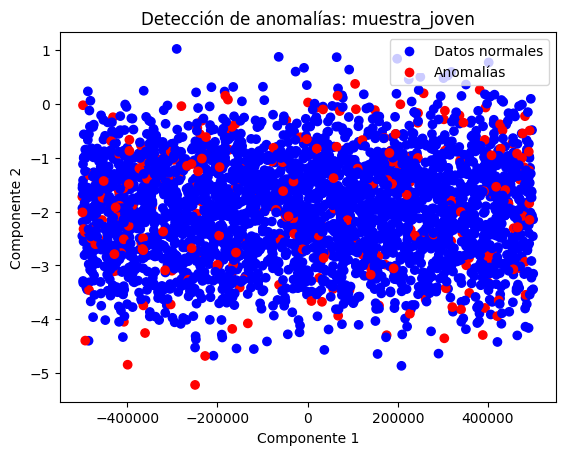

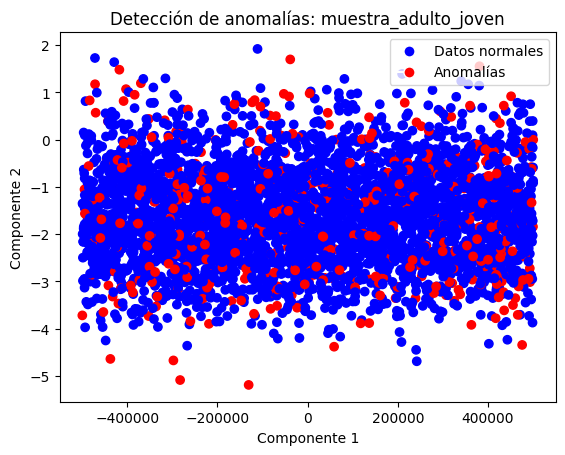

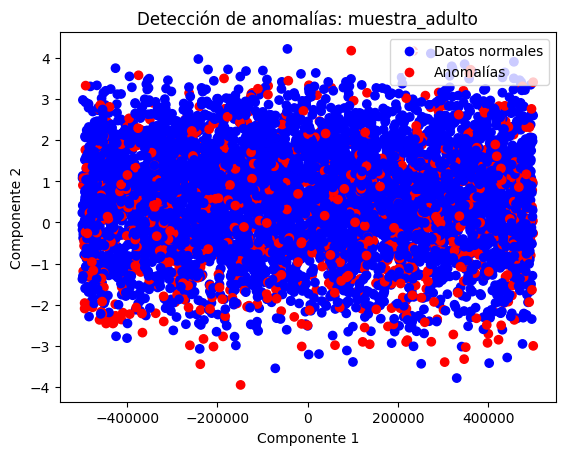

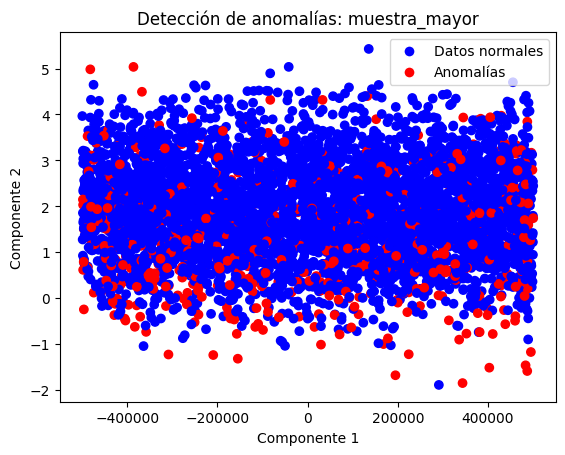

In [46]:
# Definimos los colores para cada etiqueta de anomalía (-1 para anomalías, 1 para datos normales)
colors = {-1: 'red', 1: 'blue'}

# Plot de cada rango etario
for df, segmento in zip([muestra_joven_pred, muestra_adulto_joven_pred, muestra_adulto_pred, muestra_mayor_pred], ['muestra_joven', 'muestra_adulto_joven', 'muestra_adulto', 'muestra_mayor']):
    plt.scatter(df['Componente1'], df['Componente2'], c=df['IsAnomaly'].map(colors))
    plt.title(f"Detección de anomalías: {segmento}")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Datos normales', markerfacecolor='blue', markersize=8),
                       plt.Line2D([0], [0], marker='o', color='w', label='Anomalías', markerfacecolor='red', markersize=8)]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.show()

### 6.4 Calcular ratios y responder

In [47]:
def ratios(df_in):
    # Calculamos los predichos correctamente como fraude
    correctos_fraude = np.sum((df_in['IsAnomaly'] == -1) & (df_in['fraud_bool'] == 1))

    # Calculamos el total de datos predichos como fraude
    total_predichos_fraude = np.sum(df_in['IsAnomaly'] == -1)

    # Calculamos el total que eran realmente fraude
    total_real_fraude = np.sum(df_in['fraud_bool'] == 1)

    # Calculamos el ratio P
    P = correctos_fraude / total_predichos_fraude

    # Calculamos el ratio R
    R = correctos_fraude / total_real_fraude

    print(f'Ratio P: {np.round(P, 3)}')
    print(f'Ratio R: {np.round(R, 3)}')

In [48]:
for df, segmento in zip([muestra_completa, muestra_joven_pred, muestra_adulto_joven_pred, muestra_adulto_pred, muestra_mayor_pred], ['muestra_completa', 'muestra_joven', 'muestra_adulto_joven', 'muestra_adulto', 'muestra_mayor']):
    print(segmento)
    ratios(df)
    print('----------------------')

muestra_completa
Ratio P: 0.324
Ratio R: 0.132
----------------------
muestra_joven
Ratio P: 0.041
Ratio R: 0.229
----------------------
muestra_adulto_joven
Ratio P: 0.318
Ratio R: 0.175
----------------------
muestra_adulto
Ratio P: 0.428
Ratio R: 0.14
----------------------
muestra_mayor
Ratio P: 0.276
Ratio R: 0.094
----------------------


Para finalizar el estudio, se ha calculado las siguiente métricas de acorde al modelo implementado:

Ratio P (Precisión): Representa la proporción de ejemplos clasificados correctamente como fraude entre todos los ejemplos clasificados como fraude. Un valor de P cercano a 1 indica una alta precisión, lo que significa que la mayoría de los ejemplos clasificados como fraude son realmente fraudulentos.

Ratio R (Recall): Representa la proporción de ejemplos clasificados correctamente como fraude entre todos los ejemplos que son realmente fraudulentos. Un valor de R cercano a 1 indica un alto recall, lo que significa que el modelo está capturando la mayoría de los casos de fraude.

En cuanto a los valores obtenidos, se tiene que:

Para toda la muestra, el ratio P es de 0.324, e indica que aproximadamente el 32.4% de los ejemplos clasificados como fraude son realmente fraudulentos. 
Para toda la muestra el ratio R es de 0.132, e indica que aproximadamente el 13.2% de todos los casos de fraude fueron identificados correctamente por el modelo.

Estos resultados indican que el modelo tiene un nivel de precisión y recall moderados en la detección de fraudes. No todas las transacciones clasificadas como fraude son realmente fraudulentas y el modelo no identifica todos los casos de fraude existentes, se identifica mucho margen para mejorar. Existe coherencia de los datos obtenidos pero vemos comportamientos completamente distintos en algunos rangos etarios. Por ejemplo la muestra joven, al tener tan pocos casos fraudulentos, el modelo tiene un mal desempeño, obteniendo ratios de P = 0.041, R = 0.229, logrando una precisión extremadamente baja. El modelo en este caso no tiene buena capacidad de generalización pues cuenta con muy poca data de entrenamiento de casos fraudulentos. Este rango etario no suele pedir créditos, por ende la baja data.

Por otro lado, vemos que en el segmento de adultos, es donde mejor se desempeña el modelo, obteniendo métricas de P = 0.428 y R = 0.14, esto debido a la data de entrenamiento y el comportamiento de este segmento etario. Si bien no es un modelo robusto, se desempeña mejor que los otros rangos etarios.
